In [1]:
# https://drive.google.com/file/d/1mNnY9TxogefNRBmQQr8hl4sVhxaqEuvK/view?usp=sharing
!gdown https://drive.google.com/uc?id=1mNnY9TxogefNRBmQQr8hl4sVhxaqEuvK

Downloading...
From: https://drive.google.com/uc?id=1mNnY9TxogefNRBmQQr8hl4sVhxaqEuvK
To: /content/MJMusicDataset.csv
100% 815k/815k [00:00<00:00, 76.0MB/s]


In [110]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from matplotlib import cm

%matplotlib inline

## Working with data

In [27]:
df = pd.read_csv('/content/MJMusicDataset.csv')
df_1 = df.drop(['name', 'instrument'], axis=1, inplace=False)
df_1['dastgah'].replace(rep, inplace=True)
df.head()

,name,dastgah,instrument,zero_corssing,spectral_centroid_mean,spectral_centroid_var,spectral_rolloff_mean,spectral_rolloff_var,chroma_1_mean,chroma_2_mean,...,mfcc_11_var,mfcc_12_var,mfcc_13_var,mfcc_14_var,mfcc_15_var,mfcc_16_var,mfcc_17_var,mfcc_18_var,mfcc_19_var,mfcc_20_var
0,ney-mahoor-ebrahimi .mp3,D_2,I_4,65545,1938.040517,303472.4474,2815.166310,1.754412e+06,0.515210,0.158007,...,482.619965,274.530334,257.260315,200.793167,177.008484,89.304535,49.159683,83.412254,154.657501,417.060425
1,Mohammad_Shojaei_nei_Mahoor.mp3,D_2,I_4,59788,1956.981873,774951.2677,2971.032035,2.082504e+06,0.209722,0.335278,...,435.338196,289.941559,337.219269,266.507416,256.131317,153.390289,90.073257,120.354729,206.031006,267.015015
2,Arash_Samimi_nei_Mahoor.mp3,D_2,I_4,85072,2735.525193,575671.7929,4268.615855,2.663909e+06,0.105867,0.108526,...,299.526794,226.705948,163.451355,140.664673,104.658630,72.048088,53.397228,83.085548,190.668487,331.626526
3,19 sarebaang mahoor.mp3,D_2,I_4,89980,2629.389833,406198.9319,4071.233715,1.005496e+06,0.153988,0.098157,...,305.978638,154.510696,281.793976,348.872650,156.062454,85.470512,45.904568,120.363800,370.077820,306.180878
4,Amjadian.mp3,D_2,I_4,58134,1659.262559,332341.1003,2789.041468,8.496746e+05,0.077795,0.036009,...,81.764854,106.146141,103.081779,85.252548,90.831291,150.201111,332.417633,299.858795,177.197845,186.112488


In [78]:
rep_1 = ['D_0', 'D_1', 'D_2', 'D_3', 'D_4', 'D_5', 'D_6']

In [14]:
# print(f'The columns of the dataframe are:\n{df.columns}')
rep = {'D_2':2, 'D_6':6, 'D_0':0, 'D_4':4, 'D_3':3, 'D_5':5, 'D_1':1}
X = df.drop(['name', 'instrument', 'dastgah'], axis=1, inplace=False).values
y = df['dastgah'].replace(rep, inplace=False).values

print(f'Shape of whole data is {X.shape}')

Shape of whole data is (926, 69)


Splitting

In [6]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    shuffle = True,
    random_state = 54
)
print(f'Shape of training data is {x_train.shape}')
print(f'Shape of testing data is {x_test.shape}')

Shape of training data is (740, 69)
Shape of testing data is (186, 69)


Distribution

<ipython-input-18-6098519f9184>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Set2');


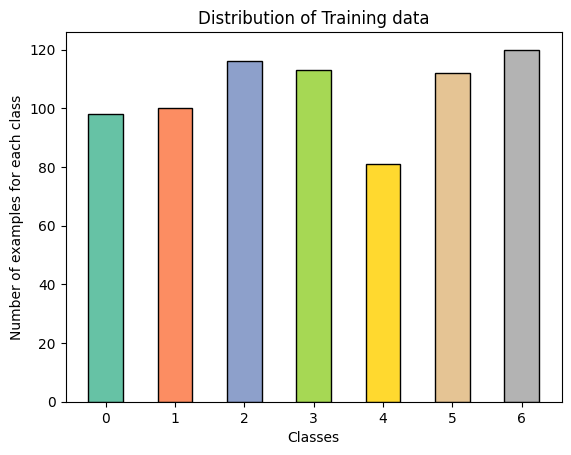

In [18]:
hist, bins = np.histogram(y_train,bins=7);
cmap = cm.get_cmap('Set2');

bins = np.unique(y_train) # For the bins to come
plt.bar(bins, hist, width=0.5,edgecolor='black',color=cmap(np.linspace(0, 1, len(hist))));
plt.xticks(range(0,7), range(0,7));
plt.title('Distribution of Training data');
plt.ylabel('Number of examples for each class');
plt.xlabel('Classes');

<ipython-input-111-27f2a8c19869>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Set2');


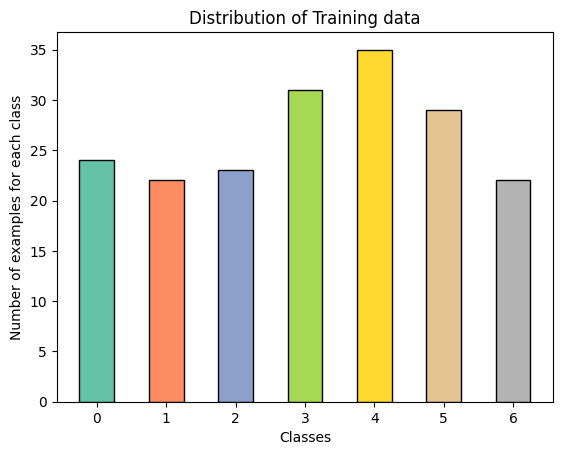

In [111]:
hist, bins = np.histogram(y_test,bins=7);
cmap = cm.get_cmap('Set2');

bins = np.unique(y_test) # For the bins to come
plt.bar(bins, hist, width=0.5,edgecolor='black',color=cmap(np.linspace(0, 1, len(hist))));
plt.xticks(range(0,7), range(0,7));
plt.title('Distribution of Training data');
plt.ylabel('Number of examples for each class');
plt.xlabel('Classes');

Corr. matrixx

Text(0.5, 1.0, 'Corrlation between data features')

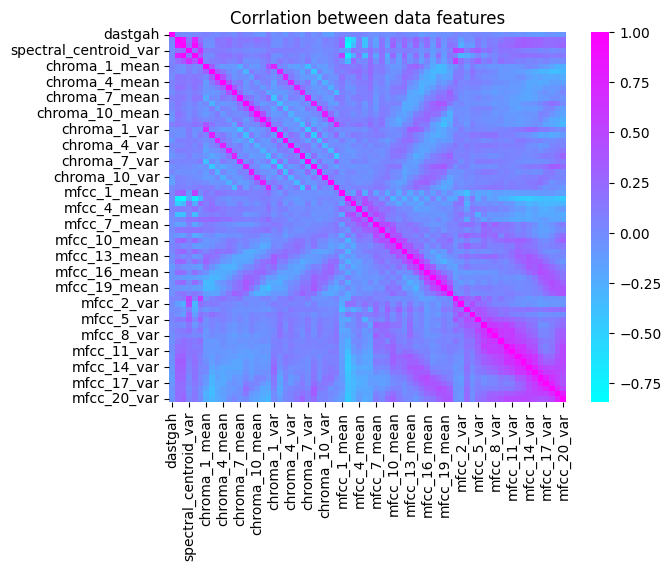

In [112]:
sns.heatmap(df_1.corr(), annot=False, cmap='cool');
# plt.xticks(np.array(range(0,7)).astype('float32')+0.5, range(1,8));
# plt.yticks(np.array(range(0,7)).astype('float32')+0.5, range(1,8), rotation=0);
plt.title('Corrlation between data features')

In [43]:
print(np.sort(np.abs(df_1.corr().dastgah)))

[4.65301362e-04 3.56096475e-03 4.13129550e-03 5.80556523e-03
 6.23186437e-03 6.41081430e-03 7.33123313e-03 8.73278929e-03
 1.17995754e-02 1.19955229e-02 1.20405921e-02 1.32420985e-02
 1.41984900e-02 1.44534985e-02 1.66528448e-02 1.75992142e-02
 1.91170884e-02 1.96247333e-02 1.96488658e-02 2.05364680e-02
 2.14017560e-02 2.18435278e-02 2.28656693e-02 2.35849784e-02
 2.47568479e-02 2.57629301e-02 2.68182333e-02 2.72005445e-02
 2.94372077e-02 2.97775275e-02 2.97803864e-02 3.06640638e-02
 3.30411534e-02 3.46244938e-02 3.61875890e-02 3.77355446e-02
 3.79611914e-02 4.18172926e-02 4.22349836e-02 4.29958625e-02
 4.59800883e-02 4.61310647e-02 4.91209783e-02 4.94907073e-02
 5.00880442e-02 5.13892531e-02 5.15182763e-02 5.37168333e-02
 5.77726311e-02 5.81445217e-02 5.93684938e-02 6.30992307e-02
 6.77016074e-02 7.03616493e-02 7.06416159e-02 7.62228521e-02
 8.15523481e-02 8.17932410e-02 8.61985194e-02 8.67981274e-02
 8.93267283e-02 9.10069866e-02 9.37711039e-02 9.79177830e-02
 1.04156849e-01 1.124660

LDA

In [51]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [56]:
# LDA
lda_transform = LDA(n_components=6)
x_train_lda = lda_transform.fit_transform(x_train, y_train)
x_test_lda = lda_transform.transform(x_test)
x_lda = lda_transform.transform(X)

Show

In [57]:
from sklearn.manifold import TSNE

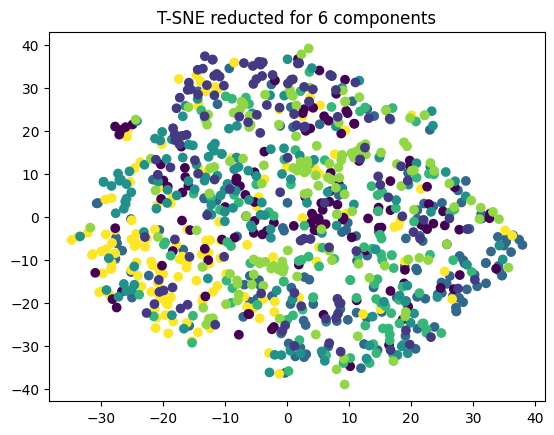

In [59]:
# t-SNE
tsne_transform = TSNE(n_components=2, perplexity=30)
x_tsne = tsne_transform.fit_transform(x_lda)

plt.scatter(x_tsne[:,0], x_tsne[:,1], c=y)
plt.title('T-SNE reducted for 6 components');

Normalization

In [69]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [71]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_lda)
x_test_scaled = scaler.transform(x_test_lda)
x_scaled = scaler.transform(x_lda)

## Implementing SVM

In [60]:
from sklearn.svm import SVC, LinearSVC

In [72]:
# Linear train
svm_linear = LinearSVC(tol=0.0001)
svm_linear.fit(x_train_scaled, y_train)

# Non-linear train
svm_non = SVC(
    kernel = 'rbf',
    C = 0.6
)
svm_non.fit(x_train_scaled, y_train);

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [63]:
from sklearn.metrics import confusion_matrix, classification_report

In [73]:
y_hat_lin= svm_linear.predict(x_test_lda)
cm_lin = confusion_matrix(y_test, y_hat_lin)
cm_lin = cm_lin/np.sum(cm_lin, axis=1).reshape(-1,1)

y_hat= svm_non.predict(x_test_lda)
cm = confusion_matrix(y_test, y_hat)
cm = cm/np.sum(cm, axis=1).reshape(-1,1)

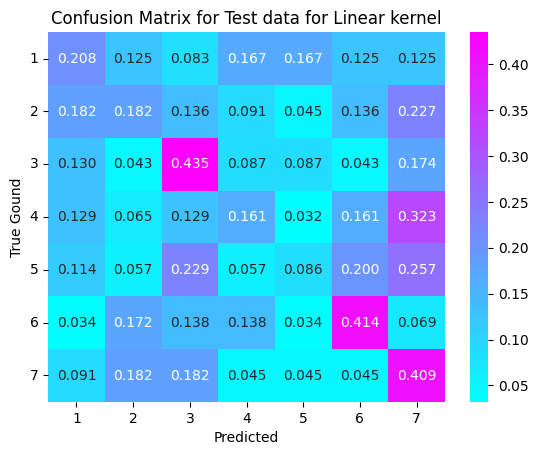

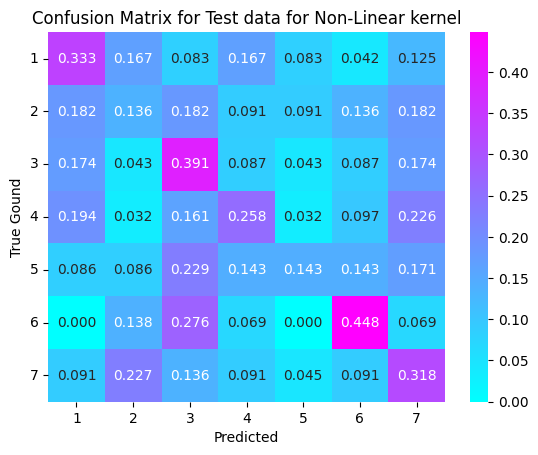

In [77]:
sns.heatmap(cm_lin, annot=True, cmap='cool', fmt='.3f');
plt.xticks(np.array(range(0,7)).astype('float32')+0.5, range(1,8));
plt.yticks(np.array(range(0,7)).astype('float32')+0.5, range(1,8), rotation=0);
plt.xlabel('Predicted')
plt.ylabel('True Gound')
plt.title('Confusion Matrix for Test data for Linear kernel')
plt.show()

sns.heatmap(cm, annot=True, cmap='cool', fmt='.3f');
plt.xticks(np.array(range(0,7)).astype('float32')+0.5, range(1,8));
plt.yticks(np.array(range(0,7)).astype('float32')+0.5, range(1,8), rotation=0);
plt.xlabel('Predicted')
plt.ylabel('True Gound')
plt.title('Confusion Matrix for Test data for Non-Linear kernel')
plt.show()

In [80]:
print('Classification report for Test data for Linear kernel:\n',classification_report(y_test, y_hat_lin, target_names=rep_1))
print('Classification report for Test data for Non-Linear kernel:\n',classification_report(y_test, y_hat, target_names=rep_1))


Classification report for Test data for Linear kernel:
               precision    recall  f1-score   support

         D_0       0.22      0.21      0.21        24
         D_1       0.19      0.18      0.19        22
         D_2       0.29      0.43      0.34        23
         D_3       0.25      0.16      0.20        31
         D_4       0.23      0.09      0.13        35
         D_5       0.38      0.41      0.39        29
         D_6       0.21      0.41      0.28        22

    accuracy                           0.26       186
   macro avg       0.25      0.27      0.25       186
weighted avg       0.25      0.26      0.24       186

Classification report for Test data for Non-Linear kernel:
               precision    recall  f1-score   support

         D_0       0.30      0.33      0.31        24
         D_1       0.14      0.14      0.14        22
         D_2       0.23      0.39      0.29        23
         D_3       0.32      0.26      0.29        31
         D_4    

Grid Search

In [81]:
from sklearn.model_selection import GridSearchCV

In [88]:
model = LinearSVC()

grid_param = {
    'C': np.arange(0.000001,1,10),
    'tol': np.arange(0.00001,0.001,10),
    'loss': ['hinge', 'squared_hinge']
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(model, grid_param, cv=5, scoring='accuracy', verbose=1)

grid_search.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5, estimator=LinearSVC(),
             param_grid={'C': array([1.e-06]),
                         'loss': ['hinge', 'squared_hinge'],
                         'tol': array([1.e-05])},
             scoring='accuracy', verbose=1)

In [90]:
print(f'The best score on Test data is :{grid_search.score(x_test_scaled,y_test):.4f}')
print(f'The best parameters are :{grid_search.best_params_}')
best_p = grid_search.best_params_

The best score on Test data is :0.2634
The best parameters are :{'C': 1e-06, 'loss': 'hinge', 'tol': 1e-05}


## Dim. reduction

In [91]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [92]:
# PCA
pca_transform = PCA(n_components=2)
x_train_pca = pca_transform.fit_transform(x_train)
x_test_pca = pca_transform.transform(x_test)
x_pca = pca_transform.transform(X)

# LDA
lda_transform = LDA(n_components=3)
x_train_lda = lda_transform.fit_transform(x_train, y_train)
x_test_lda = lda_transform.transform(x_test)
x_lda = lda_transform.transform(X)

In [93]:
from mpl_toolkits.mplot3d import Axes3D

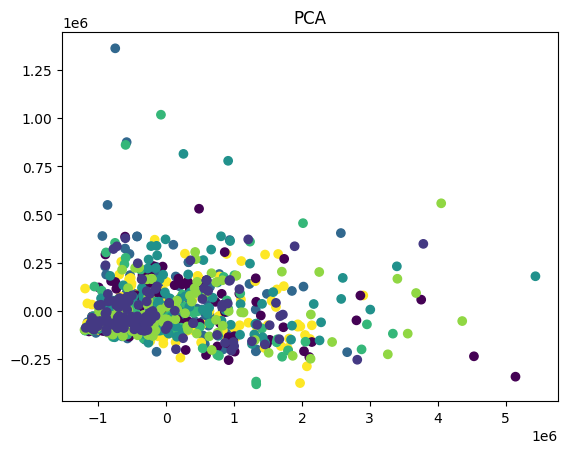

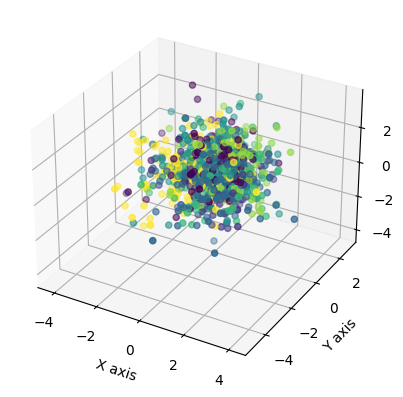

In [98]:
plt.scatter(x_pca[:,0], x_pca[:,1], c=y)
plt.title('PCA');

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_lda[:,0], x_lda[:,1], x_lda[:,2], c=y, cmap='viridis')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()

Train with pca s


In [ ]:
ss = []
xx = []
for i in range(1,60):
    pca_transform = PCA(n_components=i)
    x_train_pca = pca_transform.fit_transform(x_train)
    x_test_pca = pca_transform.transform(x_test)
    best_p['penalty'] =  'l2'
    model =  LinearSVC(C= 1e-06, loss= 'hinge', tol= 1e-05)
    model.fit(x_train_pca, y_train)
    ss.append(model.score(x_test_pca,y_test))
    xx.append(i)
    # print(f'score for {i} features is {ss[-1]}')

Text(0.5, 1.0, 'Acc. for different PCA components')

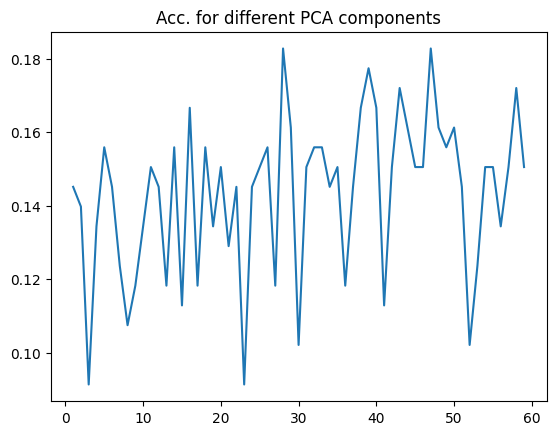

In [108]:
plt.plot(xx,ss)
plt.title('Acc. for different PCA components')